In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline


In [33]:
data = np.loadtxt("./fairness-anl-pt1.es.net-1-off-controlOutput.csv", delimiter=",", skiprows=1, dtype=str)

print data.shape
print data[:1, :]

end = [float(e.split(':')[2][:-1]) for e in data[:, 1]]
print end[:5]

data = np.asarray(data[:, 2:], dtype=np.float32)
data = np.hstack((np.zeros((data.shape[0], 1)), data))
data[:, 0] = end

print data[:2, :]

(3735, 12)
[['"-1 day' ' 23:59:59.999943"' '50.159' '50.259' '50.159' '0.1' '4.704'
  '-1' '16' '8948' '39379' '5642']]
[59.999943, 59.984306, 59.97014, 59.954076, 59.93822]
[[  5.99999430e+01   5.01590004e+01   5.02589989e+01   5.01590004e+01
    1.00000001e-01   4.70400000e+00  -1.00000000e+00   1.60000000e+01
    8.94800000e+03   3.93790000e+04   5.64200000e+03]
 [  5.99843060e+01   5.01590004e+01   1.00367996e+02   5.01590004e+01
    1.00000001e-01   1.15740002e+03  -1.00000000e+00   1.60000000e+01
    8.94800000e+03   3.93790000e+04   5.64200000e+03]]


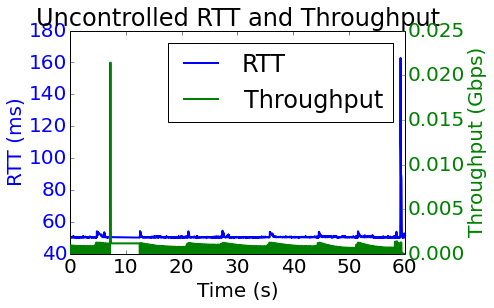

In [36]:
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 20}

matplotlib.rc('font', **font)

fig, ax1 = plt.subplots()
ax1.set_title('Uncontrolled RTT and Throughput')
p1 = ax1.plot(data[:, 0], data[:, 1], 'b', label='RTT', linewidth=2) # I know the data looks wrong here...
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('RTT (ms)')
ax1.yaxis.label.set_color('blue')
ax1.tick_params(axis='y', colors='blue')
#ax1.set_ylim(26000, 30000)

ax2 = ax1.twinx()
p2 = ax2.plot(data[:, 0], 1e-9 * data[:, 5], 'g', label='Throughput', linewidth=2)
ax2.set_ylabel('Throughput (Gbps)')
ax2.yaxis.label.set_color('green')
ax2.tick_params(axis='y', colors='green')
#ax2.set_ylim(0, 14)

ax1.legend(p1 + p2, ['RTT', 'Throughput'], loc='best')